In [61]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [62]:
data = pd.read_csv('data\preprocessed.csv').dropna()
data = data.loc[(data["'European'"]==1)|(data[" 'European'"]==1)]

In [63]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [64]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 4798 unikatowych tokenów.
Kształt tensora danych: (13483, 245)
Kształt tensora etykiet: (13483,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [67]:
X_train.shape, X_test.shape, X.shape

((10786, 10), (2697, 10), (13483,))

In [68]:
model = Sequential()
model.add(Embedding(10000, 16))
model.add(Bidirectional(LSTM(8, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(4))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
68/68 [==============================] - 8s 30ms/step - loss: 0.5784 - accuracy: 0.7418 - val_loss: 0.5294 - val_accuracy: 0.7609
Epoch 2/5
68/68 [==============================] - 1s 20ms/step - loss: 0.4963 - accuracy: 0.7592 - val_loss: 0.4287 - val_accuracy: 0.8105
Epoch 3/5
68/68 [==============================] - 2s 22ms/step - loss: 0.4098 - accuracy: 0.8294 - val_loss: 0.4028 - val_accuracy: 0.8234
Epoch 4/5
68/68 [==============================] - 1s 22ms/step - loss: 0.3748 - accuracy: 0.8516 - val_loss: 0.3988 - val_accuracy: 0.8392
Epoch 5/5
68/68 [==============================] - 2s 23ms/step - loss: 0.3530 - accuracy: 0.8623 - val_loss: 0.3981 - val_accuracy: 0.8290


In [71]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

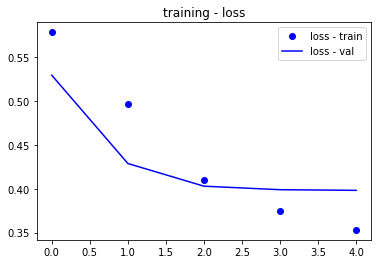

In [72]:
plot_history(history)

In [73]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.48      0.56       672
         1.0       0.84      0.93      0.88      2025

    accuracy                           0.82      2697
   macro avg       0.76      0.70      0.72      2697
weighted avg       0.80      0.82      0.80      2697



In [74]:
cohen_kappa_score(y_test, y_pred)

0.4508044691092695

In [75]:
f1_score(y_test, y_pred)

0.8829337094499294